# Introduction

This project will explore the credit card customers dataset on kaggle. We will aim to use the various features of this dataset to predict whether or not a credit card customer will churn. We will be using multiple supervised machine learning models to make our predictions which we will then compare to determine which model works best for our data. 

In [3]:
# loading the core libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# loading the csv file into a DataFrame data
data = pd.read_csv('BankChurners.csv')

In [3]:
# inspecting data to see how many rows and columns we have
data.shape

(10127, 23)

Our dataset contains **10127 rows** and **21 columns**. This provides plenty of data points to build our models.

In [4]:
# let's have a look at our dataset
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


It is unsure what exactly what data the last two columns are showing. However, it was noted in the data description on kaggle that we should ignore these last two features.

In [5]:
# dropping last two columns
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis = 1)

In [6]:
# checking that the columns were dropped
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Looking at our dataframe, we can already see that we have both categorical and continuous/numerical features. We will have to convert the categorical data later on before we build our ML models. 

In [8]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

We can now check the data for any missing values. It appears our data has no missing values.

In [9]:
# checking the data for missing values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Exploratory Data Analysis

## Visualizing our Data

As mentioned earlier, our dataset has both categorical and numerical features. The categorical features are:

- **Attrition_Flag:** Existing Customer, Attrited Customer
- **Gender:** M, F
- **Education_Level:** Unknown, Uneducated, High School, College, Graduate, Post-Graduate, Doctorate
- **Marital_Status:** Unknown, Single, Married, Divorced
- **Income_Category:** Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K +, Unknown
- **Card_Category:** Blue, Silver, Gold, Platinum

We can visualize the categorical features by plotting them as a countplot using seaborn. 

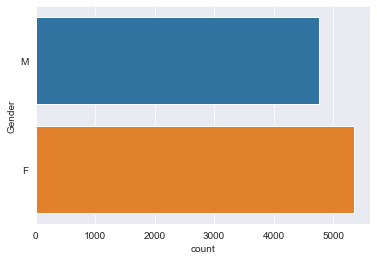

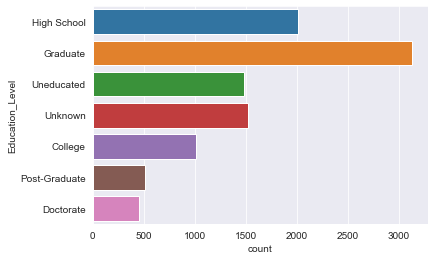

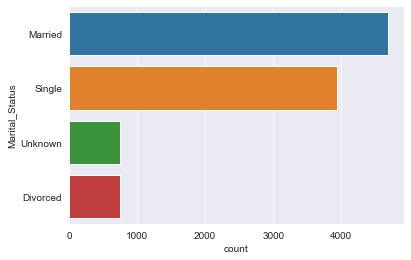

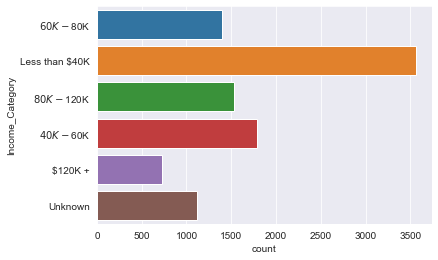

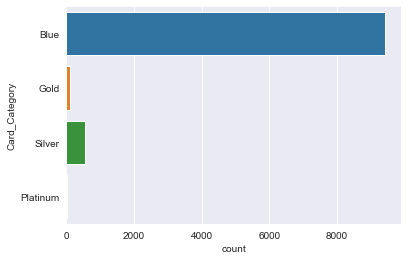

<Figure size 432x288 with 0 Axes>

In [10]:
# first create a list of the categorical features
cat_features = [ 
                'Gender', 
                'Education_Level', 
                'Marital_Status', 
                'Income_Category', 
                'Card_Category'
                ]

# looping through each of the features in cat_features
for cat in cat_features:
    sns.set_style("darkgrid")
    sns.countplot(data = data, y = cat)
    plt.show()
    plt.clf()

## Categorical Data Observations

-We can see from our plots that roughly **16%** of all of our credit card customers have attrited. This means our dataset is imbalanced, which is consistent with real world situations where we rarely find balanced datasets. 

-We have almost equal numbers of male and female customers.

-The majority of credit card customers are Graduates. 

-Most of the customers have the Blue card and the majority of our customers' income is less than $40K which may indicate a possible correlation between Card_Category and Income_Category.

-It is also evident that as customers' education level and income category are increased, the less they use credit cards. 

The numerical features are:

- **Customer_Age:** Customer's age in years
- **Dependent_count:** Customer's number of dependents
- **Months_on_book:** Number of months the credit card holder has been a customer of the bank
- **Total_Relationship_Count:** Total number of products possessed by the customer
- **Months_Inactive_12_mon:** Number of months the customer has been inactive in the last 12 months
- **Contacts_Count_12_mon:** Numer of contacts with the customer in the last 12 months
- **Credit_Limit:** Customer's maximum credit allowance
- **Total_Revolving_Bal:** Total revolving balance on the customer's credit card
- **Avg_Open_To_Buy:** Average open to buy credit line in the last 12 months
- **Total_Amt_Chng_Q4_Q1:** Difference in transaction amount from Q4 to Q1 
- **Total_Trans_Amt:** Total amount transferred in the last 12 months
- **Total_Trans_Ct:** Total number of transactions in the last 12 months
- **Total_Ct_Chng_Q4_Q1:** Change in transaction count from Q4 to Q1 
- **Avg_Utilization_Ratio:** Average card utilization ratio 

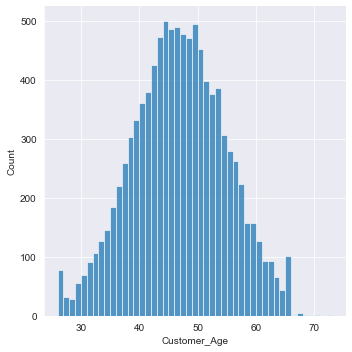

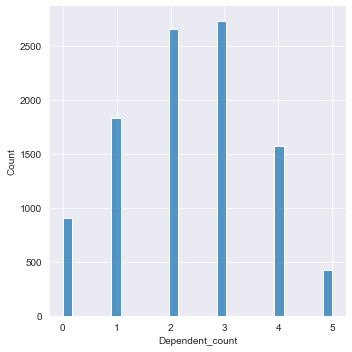

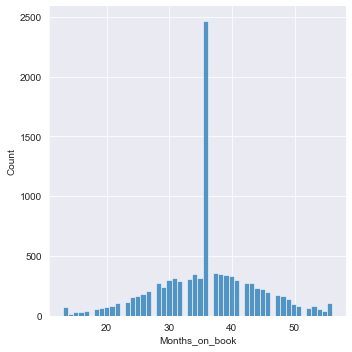

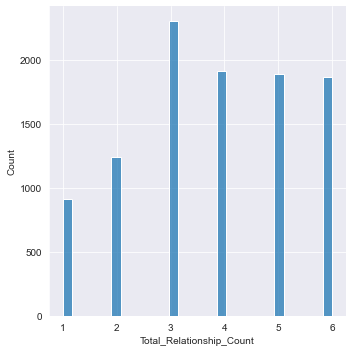

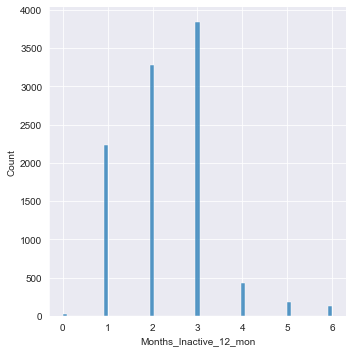

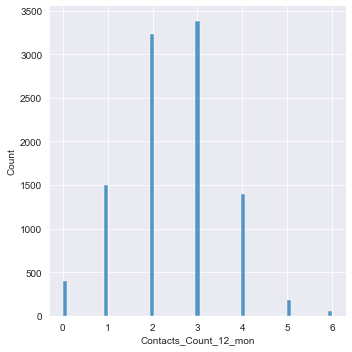

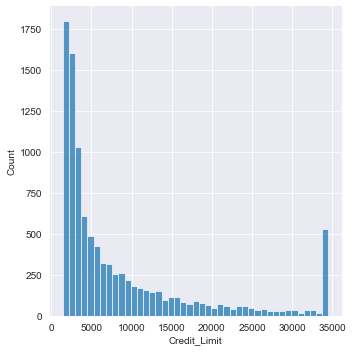

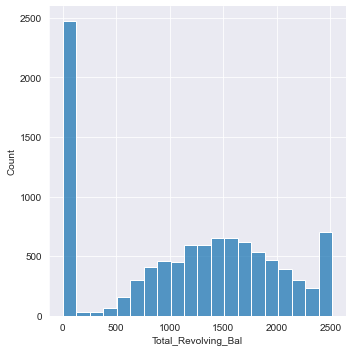

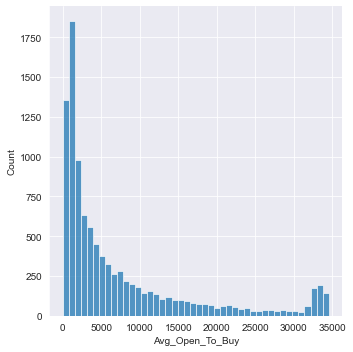

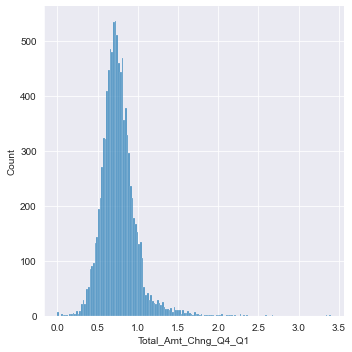

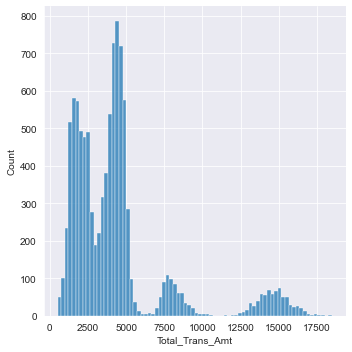

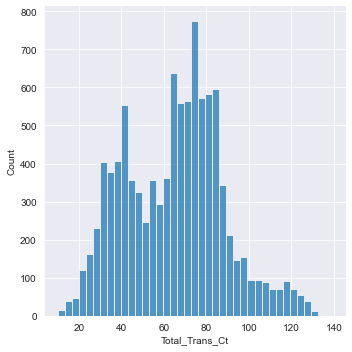

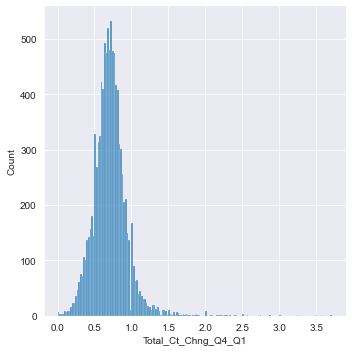

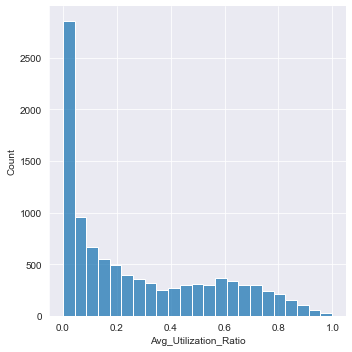

In [11]:
# create a list of the numerical features
num_features = [
                'Customer_Age', 
                'Dependent_count', 
                'Months_on_book', 
                'Total_Relationship_Count', 
                'Months_Inactive_12_mon', 
                'Contacts_Count_12_mon',
                'Credit_Limit',
                'Total_Revolving_Bal',
                'Avg_Open_To_Buy',
                'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt',
                'Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1',
                'Avg_Utilization_Ratio'
                ]

# looping through each of the features in num_features
for num in num_features:
    sns.set_style("darkgrid")
    sns.displot(data = data, x = num)
    plt.show()

## Numerical Data Observations

The age of our customers appears to be similar to a normal distribution with the majority of the ages being between the early 40s to late 50s. 

There is a very significant majority for Months_on_book for 36 months, or 3 years. Perhaps this could be length of an appealing contract.

Credit limit and Avg_Open_to_Buy both show an exponential distribution apart from some outliers. This is consistent with what we observed in our customers' income and indicates a possible correlation. Total transaction amount also shows a peak towards the beginning of the graph just under $5K and then decreases followed by a few small peaks suggesting that the majority of customers do not transfer large sums of money. 

Finally, it is interesting to see that the majority of our customers have an Avg_Utilization_Ratio of zero. This means that among credit card holders, most of them do not actually use their credit cards. 


## Dimensionality Reduction I: Checking for feature correlation

At this stage, it would be useful to check our feature variables for correlation. 

First, let's make sure our data is transformed into numeric labels. 

We will begin by changing the 'Attrition_Flag' column to 'Atrrited' and changing the categorical classes of 'Existing Customer' and 'Attrited Customer' to 0 and 1 respectively. 

In [12]:
# creating a column 'Attrited'
data['Attrited'] = data.Attrition_Flag.map({'Existing Customer': 0, 'Attrited Customer': 1})

# define data without 'Attrition_Flag' and CLIENTNUM (irrelevent to our target variable)
data = data.drop(['Attrition_Flag', 'CLIENTNUM'], axis = 1).copy()

In [13]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# looping through each of the categorical features
for cat in cat_features:
    label_encoder = LabelEncoder()
    data[cat] = label_encoder.fit_transform(data[cat])

# check data is label encoded as expected
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [14]:
# define the feature matrix
X = data.drop('Attrited', axis=1) 

# define the target variable
y = data['Attrited']

We will now plot a heatmap to check the correlation between the feature variables. 

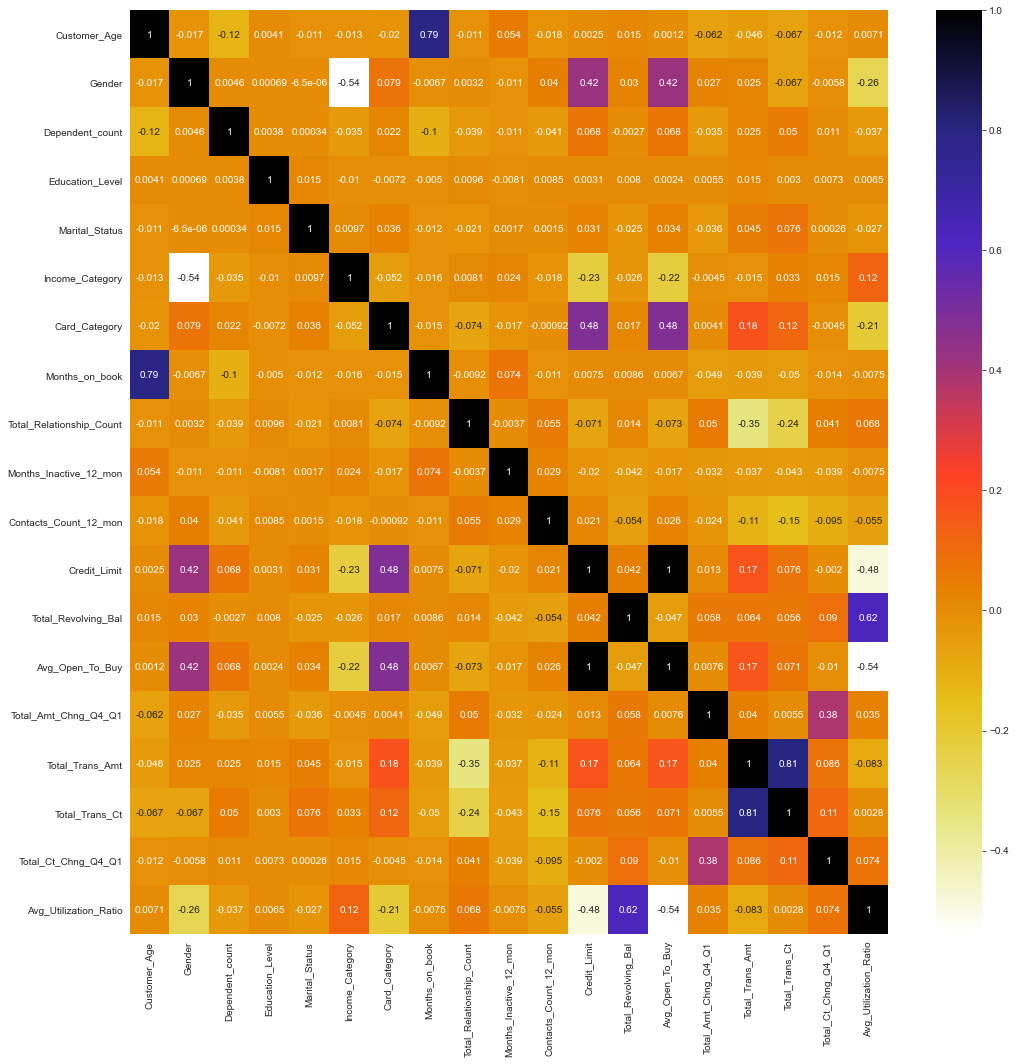

In [15]:
# using Pearson Correlation
plt.figure(figsize=(17, 17))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

We can see from the heatmap that there are some features showing high levels of correlation. Specifically, we have:

- **Months_on_book** & **Customer_Age**: 79% correlation
- **Total_Trans_Amt** & **Total_Trans_Ct**: 81% correlation
- **Credit_Limit** & **Avg_Open_To_Buy**: 100% correlation

We can therefore select one feature from each of these pairs to be removed from our dataset. The ones we will **remove** are:

- **Months_on_book**
- **Total_Trans_Amt**
- **Avg_Open_To_Buy**

In [16]:
# dropping the unnecessary features
X = X.drop(['Months_on_book', 'Total_Trans_Amt', 'Avg_Open_To_Buy'], axis=1)

## Dimensionality Reduction II: Univariate Feature Selection

The next step is to determine the significance of each of our features in relation to our target variable. We will be using sklearn's SelectKBest and since we have a classification problem, we will employ the Chi-Squared statistical hypothesis test to do this. 

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

# applying SelectKBest
best_features = SelectKBest(chi2, k=10)
fit = best_features.fit(X, y)

In [18]:
scores_df = pd.DataFrame(fit.scores_, columns=['Score'])
columns_df = pd.DataFrame(X.columns)

In [19]:
features_ranked = pd.concat([columns_df, scores_df], axis=1)
features_ranked.columns = ['Features', 'Score']
features_ranked

,Features,Score
0,Customer_Age,4.654893
1,Gender,7.443223
2,Dependent_count,2.626071
3,Education_Level,0.339231
4,Marital_Status,1.302755
5,Income_Category,2.475170
6,Card_Category,0.986120
7,Total_Relationship_Count,144.398171
8,Months_Inactive_12_mon,102.667123
9,Contacts_Count_12_mon,211.039445


In [20]:
# display the 10 highest scored features
features_ranked.nlargest(10, 'Score')

,Features,Score
11,Total_Revolving_Bal,400235.401723
10,Credit_Limit,55227.259276
13,Total_Trans_Ct,11865.365976
9,Contacts_Count_12_mon,211.039445
7,Total_Relationship_Count,144.398171
8,Months_Inactive_12_mon,102.667123
15,Avg_Utilization_Ratio,89.116891
14,Total_Ct_Chng_Q4_Q1,67.802873
12,Total_Amt_Chng_Q4_Q1,10.998295
1,Gender,7.443223


We will be using these 10 features to predict our target variable. Now we are ready to proceed to data visualization.

# Pre-processing our data

Our feature variables are:

- Total_Revolving_Bal
- Credit_Limit
- Total_Trans_Ct
- Contacts_Count_12_mon
- Total_Relationship_Count
- Months_Inactive_12_mon
- Avg_Utilization_Ratio
- Total_Ct_Chng_Q4_Q1
- Total_Amt_Chng_Q4_Q1
- Gender

We can now update our feature matrix X to contain only the our selected variables. 

In [21]:
# current features in the feature matrix
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [22]:
# dropping the unnecessary features
X = X.drop([
            'Customer_Age', 
            'Dependent_count', 
            'Education_Level', 
            'Marital_Status', 
            'Income_Category',
            'Card_Category',
            ],
             axis=1)

# checking our feature matrix 
X.head()            

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,5,1,3,12691.0,777,1.335,42,1.625,0.061
1,0,6,1,2,8256.0,864,1.541,33,3.714,0.105
2,1,4,1,0,3418.0,0,2.594,20,2.333,0.000
3,0,3,4,1,3313.0,2517,1.405,20,2.333,0.760
4,1,5,1,0,4716.0,0,2.175,28,2.500,0.000


We do not need to do One-Hot Encoding because we only have one categorical variable 'Gender' which we have already transformed into a numerical type. Furthermore, there are only two categories in this feature (1 and 0).

## Normalization

Note that normalization is not necessary for all of the Machine Learning models that we will be using. For instance, Random Forest models do not require the data to be normalized.

In [23]:
X.head()

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,5,1,3,12691.0,777,1.335,42,1.625,0.061
1,0,6,1,2,8256.0,864,1.541,33,3.714,0.105
2,1,4,1,0,3418.0,0,2.594,20,2.333,0.000
3,0,3,4,1,3313.0,2517,1.405,20,2.333,0.760
4,1,5,1,0,4716.0,0,2.175,28,2.500,0.000


We can see that the scale of values in 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Ct' are all vastly different from the rest of the features. 

In [24]:
# create a list of columns that we need to normalize
cols = [
            'Total_Relationship_Count', 
            'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 
            'Credit_Limit', 
            'Total_Revolving_Bal',
            'Total_Amt_Chng_Q4_Q1', 
            'Total_Trans_Ct', 
            'Total_Ct_Chng_Q4_Q1', 
            'Avg_Utilization_Ratio',
            'Gender'
            ]

# load the preprocessing library to use MinMaxScaler 
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X[cols])
scaled_X = pd.DataFrame(d, columns=cols)
scaled_X.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender
0,0.8,0.166667,0.500000,0.340190,0.308701,0.392994,0.248062,0.437534,0.061061,1.0
1,1.0,0.166667,0.333333,0.206112,0.343266,0.453636,0.178295,1.000000,0.105105,0.0
2,0.6,0.166667,0.000000,0.059850,0.000000,0.763615,0.077519,0.628164,0.000000,1.0
3,0.4,0.666667,0.166667,0.056676,1.000000,0.413600,0.077519,0.628164,0.760761,0.0
4,0.8,0.166667,0.000000,0.099091,0.000000,0.640271,0.139535,0.673129,0.000000,1.0


## Dealing with imbalanced data

Recall from our data visualizations earlier that we determined our dataset to be imbalanced.  We can see exactly how imbalanced our dataset is by using **value_counts()**. There are many ways to deal with imbalanced datasets. The most simple way is to resample our data such that both classes of our target variable contain an equal number of samples. 

We can use Synthetic Minority Oversampling Technique (SMOTE) to do this. SMOTE works by selecting examples of data points that are close in the feature space, drawing a line between these examples and adding a synethic data point along the line. By default, SMOTE allows us to resample our data such that the minority classes are increased to match the amount of samples of the majority class. 

In [25]:
# clear picture of data imbalance
y.value_counts()

0    8500
1    1627
Name: Attrited, dtype: int64

In [26]:
# loading SMOTE from imblearn
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(scaled_X, y)

# checking the resulting resampled y
y_resampled.value_counts()

0    8500
1    8500
Name: Attrited, dtype: int64

# Building our ML Models

## Generating training and testing data

In [27]:
# import train_test_split to generate our test and train data
from sklearn.model_selection import train_test_split, cross_val_score

# generating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state = 42)

# convert to 1d array
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## K-Nearest Neighbor Model (KNN)

In [28]:
# load KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# create an object of our classifier
knn = KNeighborsClassifier(
                           n_neighbors=7, 
                           metric='euclidean', 
                           p=2,
                           )

# train our classifier 
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [29]:
# use our classifier to make predictions based on training and testing data
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
# accuracy of the KNN model on the training and testing data
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

(0.9327058823529412, 0.9096470588235294)

### Cross Validation

Recall from earlier, that when we split our model into X_train, y_train, X_test, and y_test, we set the `test_size` parameter equal to 0.25. This means that our data was split into four chunks each containing 25% of the data and we used the first chunk for our testing data and the remaining three for our training data. Cross validation allows us to see how different configurations of training and testing sets would have performed on our model which gives us more confidence in the accuracy of our model. 

In [31]:
scores_data_knn = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
print("%0.1f%% accuracy with a standard deviation of %0.2f" % (scores_data_knn.mean() * 100, scores_data_knn.std()))

90.1% accuracy with a standard deviation of 0.06


## Random Forest Classifier Model

In [32]:
# load RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# create object of classifier
random_forest = RandomForestClassifier(
                                       n_estimators=100,  
                                       random_state=42, 
                                       )

# train our classifier
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# use our classifier to make predictions based on training and testing data
y_pred_train_rf = random_forest.predict(X_train)
y_pred_rf = random_forest.predict(X_test)

In [34]:
accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_test, y_pred_rf)

(1.0, 0.955764705882353)

### Cross Validation

In [35]:
scores_data_rf = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy')
print("%0.1f%% accuracy with a standard deviation of %0.2f" % (scores_data_rf.mean() * 100, scores_data_rf.std()))

92.1% accuracy with a standard deviation of 0.03


## Logistic Regression Model

In [36]:
# load LogisticRegression
from sklearn.linear_model import LogisticRegression

# create object of classifier
log_reg = LogisticRegression()

# train our classifier
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
# use our classifier to make predictions based on training and testing data
y_pred_train_lr = log_reg.predict(X_train)
y_pred_lr = log_reg.predict(X_test)

In [38]:
accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_lr)

(0.831921568627451, 0.8378823529411765)

### Cross Validation

In [39]:
scores_data_lr = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')
print("%0.1f%% accuracy with a standard deviation of %0.2f" % (scores_data_lr.mean() * 100, scores_data_lr.std()))

87.4% accuracy with a standard deviation of 0.02


## SVM Model

In [44]:
# load SVC
from sklearn.svm import SVC

# create object of classifier
svm = SVC()

# train our classifier
svm.fit(X_train, y_train)

SVC()

In [45]:
# use our classifier to make predictions based on training and testing data
y_pred_train_svm = svm.predict(X_train)
y_pred_svm = svm.predict(X_test)

In [46]:
accuracy_score(y_train, y_pred_train_svm), accuracy_score(y_test, y_pred_svm)

(0.899921568627451, 0.9028235294117647)

### Cross Validation

In [47]:
scores_data_svm = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
print("%0.1f%% accuracy with a standard deviation of %0.2f" % (scores_data_svm.mean() * 100, scores_data_svm.std()))

83.9% accuracy with a standard deviation of 0.00


## XGBoost Classifier Model

In [52]:
#load the xgb library
import xgboost as xgb

# create object of classifier
clf_xgb = xgb.XGBClassifier(
                            objective='binary:logistic',   
                            eval_metric = 'error'
                            )

# train our classifier
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
# use our classifier to make predictions based on training and testing data
y_pred_train_xgb = clf_xgb.predict(X_train)
y_pred_xgb = clf_xgb.predict(X_test)

In [54]:
accuracy_score(y_train, y_pred_train_xgb), accuracy_score(y_test, y_pred_xgb)

(0.9949803921568627, 0.9581176470588235)

### Cross Validation

In [55]:
scores_data_xgb = cross_val_score(clf_xgb, X, y, cv=10, scoring='accuracy')
print("%0.1f%% accuracy with a standard deviation of %0.2f" % (scores_data_xgb.mean() * 100, scores_data_xgb.std()))

92.1% accuracy with a standard deviation of 0.03


# Evaluating our models

## Hyperparameter Tuning

Based on the mean accuracies we computed from our cross validations, the XGBoost model has the highest accuracy at 92% followed by the random forest model with an accuracy of 90%. Before we conclude that the XGBoost model is the best one for our data, we need to consider the possibility that the parameter values we inputted for our models might not be optimal. We must therefore first find the optimal parameters of each model we created before we can compare them. In order to do this, we can employ **RandomizedSearchCV**. 

### KNN Model

For the KNN model, we will be testing different values of 'n_neighbors' (k values). The model we currently have has a value of 7 for this parameter. 

In [157]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [903]:
# create a list of different k values we will be testing
k_range = range(1, 31)

In [904]:
# create a parameter dictionary
param_dict = dict(n_neighbors=k_range)

In [905]:
# instantiate an object rand
rand = RandomizedSearchCV(knn, param_dict, cv=10, scoring='accuracy', n_iter=10, random_state=42)

In [906]:
# fit our training data onto rand
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=KNeighborsClassifier(metric='euclidean',
                                                  n_neighbors=7),
                   param_distributions={'n_neighbors': range(1, 31)},
                   random_state=42, scoring='accuracy')

In [908]:
# the best parameters for our estimator
rand.best_params_

{'n_neighbors': 1}

When we first ran our KNN model, we got an accuracy of **91%** on our test data. With the improved parameters, our model got an accuracy of **94%**. 

### Random Forest Model

For our random forest model, we will be optimising the **n_estimators** and **max_depth** parameters.

In [909]:
# create list of n_estimator values
n_estimators_range = range(1, 200)

# create list for max_depth values
max_depth_range = range(1, 20)

In [910]:
# create a parameter dictionary
rf_param_dict = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)

In [911]:
# instantiate an object rand_rf
rand_rf = RandomizedSearchCV(random_forest, rf_param_dict, cv=10, scoring='accuracy', n_iter=10, random_state=42)

In [912]:
# fit our training data onto rand_rf
rand_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(1, 200)},
                   random_state=42, scoring='accuracy')

In [914]:
rand_rf.best_params_

{'n_estimators': 191, 'max_depth': 19}

When we first ran our random forest model, we got an accuracy of **95.6%** on our test data. With the improved parameters, our model got an accuracy of **96%**. 

### Logistic Regression Model

For logistic regression the parameter we will be optimising is 'penalty', which has a default of 'l2'. Penalty is used to specify the norm used in the penalization and can be selected from 'l1', 'l2', 'elasticnet', or 'none'. Depending on the penalty used, the solver will also be different.  

In [915]:
# create list of n_estimator values
penalty_values = ['l1', 'l2', 'elasticnet', 'none']

# C values
C_values = np.logspace(-3, 3, 7)

In [916]:
# create a parameter dictionary
lr_param_dist = dict(penalty=penalty_values, C=C_values)

In [917]:
# instantiate an object rand_lr
rand_lr = RandomizedSearchCV(log_reg, lr_param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=42)

In [918]:
# fit our training data onto rand_lr
rand_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=42, scoring='accuracy')

In [920]:
rand_lr.best_params_

{'penalty': 'l2', 'C': 1000.0}

When we first ran our random forest model, we got an accuracy of **83.8%** on our test data. With the improved parameters, our model got an accuracy of **83.9%**. 

### SVM Model

When we built our SVM model, we left all the parameters as their default values. We will now see if we can tune these to maximise our model accuracy.

In [146]:
# parameters dicionary
params = {
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'C': [1, 52, 10],
          'degree': [3, 8],
          'coef0': [0.001, 10, 0.5],
          'gamma': ['auto', 'scale']
          }

In [147]:
# instantiate an object rand_svm
rand_svm = RandomizedSearchCV(svm, params, cv=10, scoring='accuracy', n_iter=10, random_state=42, n_jobs=-1)

In [923]:
# fit our training data onto rand_svm
rand_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [1, 52, 10],
                                        'coef0': [0.001, 10, 0.5],
                                        'degree': [3, 8],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy')

In [925]:
rand_svm.best_params_

{'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 10, 'C': 10}

The initial SVM model we built had an accuracy of **90.3%**, with the improved parameters the accuracy was increased to **91.7%**. 

### XGBoost Model

The XGBoost model was constructed with parameters which were specifically meant for binary classification scenarios such as the one we have. Therefore, it is likely that we already have the optimal parameters selected for this model. 


In [155]:
# parameters dictionary
xgb_params = {
          'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
          'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
          'min_child_weight': [1, 3, 5, 7],
          'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
          'colsample_bytree': [0.3, 0.4, 0.5 , 0.7]
          }

In [158]:
# instantiate an object rand_xgb
rand_xgb = RandomizedSearchCV(clf_xgb, xgb_params, cv=10, scoring='accuracy', n_iter=10, random_state=42)

In [159]:
# fit our training data onto rand_xgb
rand_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='error', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimator...
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, r

In [160]:
rand_xgb.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

The initial XGBoost model we built had an accuracy of **95.8%**, with the improved parameters the accuracy was increased to **96.4%**. 

## Selecting the optimal model

To get a visual representation of the range of accuracies of each model, we have plotted the model accuracies on a bar chart. 

In [4]:
# first creating a DataFrame with all the accuracies of our models
results = {
              'Model': ['KNN', 'Random Forest', 'Logistic Regression', 'SVM', 'XGBoost'],
              'Base Mean Accuracy': [90.1, 92.1, 87.4, 83.9, 92.1],
              'Base SD': [0.06, 0.03, 0.02, 0, 0.03],
              'Optimized Mean Accuracy': [94.1, 92.2, 87.4, 85.3, 92.2],
              'Optimized SD': [0.04, 0.03, 0.02, 0.03, 0.03]
              }

results_df = pd.DataFrame(data=results)

In [5]:
results_df

,Model,Base Mean Accuracy,Base SD,Optimized Mean Accuracy,Optimized SD
0,KNN,90.1,0.06,94.1,0.04
1,Random Forest,92.1,0.03,92.2,0.03
2,Logistic Regression,87.4,0.02,87.4,0.02
3,SVM,83.9,0.00,85.3,0.03
4,XGBoost,92.1,0.03,92.2,0.03


In [12]:
# X values
models = results_df['Model']

# Y values
accuracies = results_df['Base Mean Accuracy']

# Standard Deviation (error)
error = (results_df['Base SD']) * 100

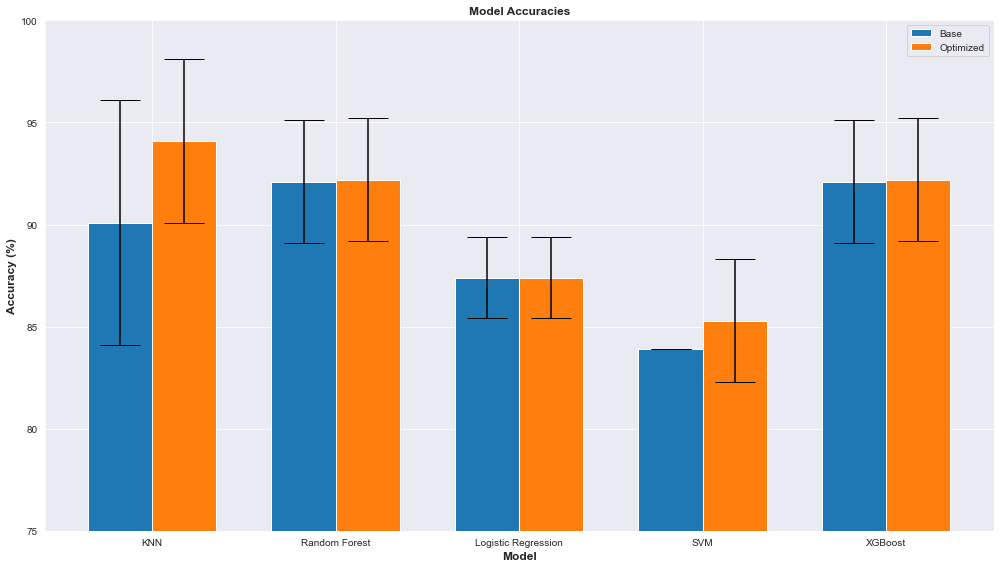

In [44]:
base_means, base_std = results_df['Base Mean Accuracy'], (results_df['Base SD']) * 100
opt_means, opt_std = results_df['Optimized Mean Accuracy'], (results_df['Optimized SD']) * 100

ind = np.arange(len(base_means))  
width = 0.35 

fig, ax = plt.subplots(1, 1, figsize=(14,8))
set_base = ax.bar(ind - width/2, base_means, width, yerr=base_std,
                    label='Base', capsize=20)
set_opt = ax.bar(ind + width/2, opt_means, width, yerr=opt_std,
                label='Optimized', capsize=20)


ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize='large')
ax.set_xlabel('Model', fontweight='bold', fontsize='large')
ax.set_title('Model Accuracies', fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(('KNN', 'Random Forest', 'Logistic Regression', 'SVM', 'XGBoost'))
ax.legend()   
ax.set_ylim([75, 100])

fig.tight_layout()
sns.set_style("darkgrid")
plt.show()

### Observations

We can see that in terms of the highest accuracy, our optimized KNN model performs the best with a max accuracy of **98.1%**. However, it can also be seen that the KNN model has the largest difference between base and optimized models. The XGBoost model on the other hand, shows very little difference after being optimized suggesting it is relatively optimized out of the box. 

The best peformer for our dataset is the optimized KNN model because it not only has the highest peak accuracy, but it also has the highest mean accuracy of all the models (**94.1%**). 